# **Importing the essential libraries**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os, shutil
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# **Defining the dataset**

In [3]:
train_path = '/content/drive/MyDrive/adult_child/train'
test_path = '/content/drive/MyDrive/adult_child/test'

In [4]:
image_categories = os.listdir('/content/drive/MyDrive/adult_child/train')

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest')

train = train_datagen.flow_from_directory(train_path,
                                         batch_size=32,
                                         target_size=(128,128),
                                         class_mode='binary',
                                         shuffle=True,
                                         interpolation='nearest')

Found 680 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test = test_datagen.flow_from_directory(test_path,
                                        batch_size=32,
                                        target_size=(128,128),
                                        class_mode='binary',
                                        shuffle=True,
                                        interpolation='nearest')

Found 120 images belonging to 2 classes.


In [8]:
class_map = dict([(v, k) for k, v in train.class_indices.items()])
print(class_map)

{0: 'adults', 1: 'children'}


# **Defining a sequential model**

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(units=64,activation='relu'))
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=1,activation='sigmoid'))
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,min_lr=0.001,factor=0.1)
model_checkpoint = ModelCheckpoint('checkpoint/',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=90)

r = cnn.fit(train,
           epochs=100,
           batch_size=32,
           validation_data=test,
           callbacks=[reduce_lr,model_checkpoint,early_stopping])

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 0.7022 - accuracy: 0.4853 
Epoch 1: val_accuracy improved from -inf to 0.54167, saving model to checkpoint/


22/22 [==============================] - 366s 16s/step - loss: 0.7022 - accuracy: 0.4853 - val_loss: 0.6758 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.5132
Epoch 2: val_accuracy improved from 0.54167 to 0.55833, saving model to checkpoint/


22/22 [==============================] - 6s 289ms/step - loss: 0.6907 - accuracy: 0.5132 - val_loss: 0.6745 - val_accuracy: 0.5583 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.6710 - accuracy: 0.5853
Epoch 3: val_accuracy improved from 0.55833 to 0.63333, saving model to checkpoint/


22/22 [==============================] - 6s 295ms/step - loss: 0.6710 - accuracy: 0.5853 - val_loss: 0.6592 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - ETA: 0s - loss: 0.6682 - accuracy: 0.5809
Epoch 4: val_accuracy did not improve from 0.63333
22/22 [==============================] - 5s 246ms/step - loss: 0.6682 - accuracy: 0.5809 - val_loss: 0.6537 - val_accuracy: 0.5583 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.5838
Epoch 5: val_accuracy did not improve from 0.63333
22/22 [==============================] - 5s 243ms/step - loss: 0.6659 - accuracy: 0.5838 - val_loss: 0.6567 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.5559
Epoch 6: val_accuracy did not improve from 0.63333
22/22 [==============================] - 5s 245ms/step - loss: 0.6725 - accuracy: 0.5559 - val_loss: 0.6641 - val_accuracy: 0.5833

22/22 [==============================] - 6s 286ms/step - loss: 0.6339 - accuracy: 0.6265 - val_loss: 0.6307 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 17/100
22/22 [==============================] - ETA: 0s - loss: 0.6330 - accuracy: 0.6471
Epoch 17: val_accuracy did not improve from 0.65833
22/22 [==============================] - 5s 246ms/step - loss: 0.6330 - accuracy: 0.6471 - val_loss: 0.6643 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 18/100
22/22 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.6662
Epoch 18: val_accuracy did not improve from 0.65833
22/22 [==============================] - 6s 288ms/step - loss: 0.6069 - accuracy: 0.6662 - val_loss: 0.6838 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 19/100
22/22 [==============================] - ETA: 0s - loss: 0.5964 - accuracy: 0.6691
Epoch 19: val_accuracy did not improve from 0.65833
22/22 [==============================] - 6s 265ms/step - loss: 0.5964 - accuracy: 0.6691 - val_loss: 0.6874 - val_accuracy: 

22/22 [==============================] - 6s 288ms/step - loss: 0.5841 - accuracy: 0.6882 - val_loss: 0.7511 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 21/100
22/22 [==============================] - ETA: 0s - loss: 0.5813 - accuracy: 0.6838
Epoch 21: val_accuracy did not improve from 0.66667
22/22 [==============================] - 5s 239ms/step - loss: 0.5813 - accuracy: 0.6838 - val_loss: 0.6768 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 22/100
22/22 [==============================] - ETA: 0s - loss: 0.5978 - accuracy: 0.6750
Epoch 22: val_accuracy did not improve from 0.66667
22/22 [==============================] - 5s 241ms/step - loss: 0.5978 - accuracy: 0.6750 - val_loss: 0.7271 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 23/100
22/22 [==============================] - ETA: 0s - loss: 0.5741 - accuracy: 0.6956
Epoch 23: val_accuracy did not improve from 0.66667
22/22 [==============================] - 5s 243ms/step - loss: 0.5741 - accuracy: 0.6956 - val_loss: 0.6877 - val_accuracy: 

22/22 [==============================] - 6s 286ms/step - loss: 0.5426 - accuracy: 0.7235 - val_loss: 0.8111 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 30/100
22/22 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.6941
Epoch 30: val_accuracy did not improve from 0.67500
22/22 [==============================] - 5s 243ms/step - loss: 0.5734 - accuracy: 0.6941 - val_loss: 0.7588 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 31/100
22/22 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.6985
Epoch 31: val_accuracy did not improve from 0.67500
22/22 [==============================] - 5s 242ms/step - loss: 0.5718 - accuracy: 0.6985 - val_loss: 0.6873 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 32/100
22/22 [==============================] - ETA: 0s - loss: 0.5139 - accuracy: 0.7382
Epoch 32: val_accuracy did not improve from 0.67500
22/22 [==============================] - 5s 244ms/step - loss: 0.5139 - accuracy: 0.7382 - val_loss: 0.8856 - val_accuracy: 

22/22 [==============================] - 6s 299ms/step - loss: 0.5132 - accuracy: 0.7176 - val_loss: 0.7825 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 38/100
22/22 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.7279
Epoch 38: val_accuracy did not improve from 0.70000
22/22 [==============================] - 5s 244ms/step - loss: 0.5280 - accuracy: 0.7279 - val_loss: 0.8298 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 39/100
22/22 [==============================] - ETA: 0s - loss: 0.5179 - accuracy: 0.7382
Epoch 39: val_accuracy did not improve from 0.70000
22/22 [==============================] - 5s 244ms/step - loss: 0.5179 - accuracy: 0.7382 - val_loss: 0.8897 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 40/100
22/22 [==============================] - ETA: 0s - loss: 0.5309 - accuracy: 0.7235
Epoch 40: val_accuracy did not improve from 0.70000
22/22 [==============================] - 5s 243ms/step - loss: 0.5309 - accuracy: 0.7235 - val_loss: 0.9558 - val_accuracy: 

22/22 [==============================] - 7s 301ms/step - loss: 0.3942 - accuracy: 0.8029 - val_loss: 0.8321 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 64/100
22/22 [==============================] - ETA: 0s - loss: 0.3872 - accuracy: 0.8338
Epoch 64: val_accuracy did not improve from 0.71667
22/22 [==============================] - 5s 243ms/step - loss: 0.3872 - accuracy: 0.8338 - val_loss: 0.9059 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 65/100
22/22 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.8029
Epoch 65: val_accuracy did not improve from 0.71667
22/22 [==============================] - 7s 299ms/step - loss: 0.4029 - accuracy: 0.8029 - val_loss: 0.9127 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 66/100
22/22 [==============================] - ETA: 0s - loss: 0.3930 - accuracy: 0.8103
Epoch 66: val_accuracy did not improve from 0.71667
22/22 [==============================] - 5s 245ms/step - loss: 0.3930 - accuracy: 0.8103 - val_loss: 0.8277 - val_accuracy: 

22/22 [==============================] - 6s 286ms/step - loss: 0.2545 - accuracy: 0.9029 - val_loss: 1.0883 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 93/100
22/22 [==============================] - ETA: 0s - loss: 0.2352 - accuracy: 0.9000
Epoch 93: val_accuracy did not improve from 0.73333
22/22 [==============================] - 5s 242ms/step - loss: 0.2352 - accuracy: 0.9000 - val_loss: 1.1782 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 94/100
22/22 [==============================] - ETA: 0s - loss: 0.2616 - accuracy: 0.8926
Epoch 94: val_accuracy did not improve from 0.73333
22/22 [==============================] - 10s 477ms/step - loss: 0.2616 - accuracy: 0.8926 - val_loss: 1.1379 - val_accuracy: 0.6750 - lr: 0.0010
Epoch 95/100
22/22 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8794
Epoch 95: val_accuracy improved from 0.73333 to 0.77500, saving model to checkpoint/


22/22 [==============================] - 7s 313ms/step - loss: 0.2932 - accuracy: 0.8794 - val_loss: 1.0105 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 96/100
22/22 [==============================] - ETA: 0s - loss: 0.2510 - accuracy: 0.8941
Epoch 96: val_accuracy did not improve from 0.77500
22/22 [==============================] - 5s 240ms/step - loss: 0.2510 - accuracy: 0.8941 - val_loss: 1.2095 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 97/100
22/22 [==============================] - ETA: 0s - loss: 0.2800 - accuracy: 0.8721
Epoch 97: val_accuracy did not improve from 0.77500
22/22 [==============================] - 7s 312ms/step - loss: 0.2800 - accuracy: 0.8721 - val_loss: 1.0665 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 98/100
22/22 [==============================] - ETA: 0s - loss: 0.2218 - accuracy: 0.9059
Epoch 98: val_accuracy did not improve from 0.77500
22/22 [==============================] - 7s 288ms/step - loss: 0.2218 - accuracy: 0.9059 - val_loss: 1.3288 - val_accuracy: 

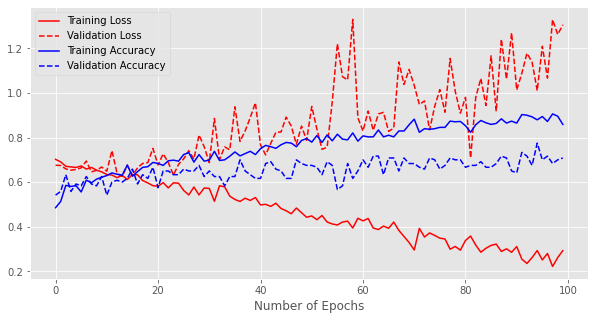

In [ ]:
h = r.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
cnn.save('/content/drive/MyDrive/adult_child/children_adult_classifier.h5')


# **Using pre-trained VGG16 model**

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(
                    weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3)
                 )


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
  loss = "binary_crossentropy",
  optimizer = tf.keras.optimizers.RMSprop(lr = 2e-5),
  metrics = ["accuracy"]
)

history = model.fit_generator(
  train,
  steps_per_epoch = 15,
  epochs = 30,
  validation_data = test,
  validation_steps = 1
)

Epoch 1/30
15/15 [==============================] - 6s 291ms/step - loss: 0.5298 - accuracy: 0.7237 - val_loss: 0.7230 - val_accuracy: 0.6562
Epoch 2/30
15/15 [==============================] - 4s 272ms/step - loss: 0.3130 - accuracy: 0.8772 - val_loss: 0.3699 - val_accuracy: 0.7500
Epoch 3/30
15/15 [==============================] - 4s 272ms/step - loss: 0.2494 - accuracy: 0.8904 - val_loss: 0.4199 - val_accuracy: 0.8125
Epoch 4/30
15/15 [==============================] - 4s 276ms/step - loss: 0.1964 - accuracy: 0.9189 - val_loss: 0.9971 - val_accuracy: 0.6250
Epoch 5/30
15/15 [==============================] - 4s 280ms/step - loss: 0.1281 - accuracy: 0.9542 - val_loss: 0.4719 - val_accuracy: 0.8438
Epoch 6/30
15/15 [==============================] - 4s 283ms/step - loss: 0.1451 - accuracy: 0.9479 - val_loss: 0.8584 - val_accuracy: 0.6875
Epoch 7/30
15/15 [==============================] - 4s 274ms/step - loss: 0.1182 - accuracy: 0.9518 - val_loss: 0.5853 - val_accuracy: 0.8750
Epoch 

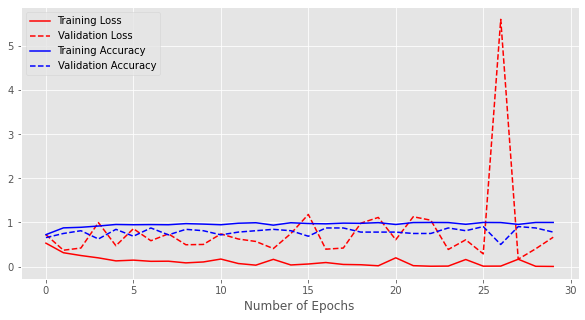

In [ ]:
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/adult_child/model_82.5.h5')

# **Using pre-trained InceptionV3 model**

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.optimizers import RMSprop
from keras import models, layers, optimizers

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  fill_mode='nearest')

train = train_datagen.flow_from_directory(train_path,
                                         batch_size=32,
                                         target_size=(150,150),
                                         class_mode='binary',
                                         shuffle=True,
                                         interpolation='nearest')

Found 680 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test = test_datagen.flow_from_directory(test_path,
                                        batch_size=32,
                                        target_size=(150,150),
                                        class_mode='binary',
                                        shuffle=True,
                                        interpolation='nearest')

Found 120 images belonging to 2 classes.


In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc',patience=5,mode='max',verbose=1,min_lr=0.001,factor=0.1)
model_checkpoint = ModelCheckpoint('checkpoint/',monitor='val_acc',mode='max',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor='val_acc',mode='max',verbose=1,patience=20)

inc_history = model.fit_generator(
    train, 
    validation_data = test, 
    steps_per_epoch = 15, 
    epochs = 30,
    callbacks=[reduce_lr,model_checkpoint,early_stopping]
    )

Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 4.6766 - acc: 0.5396
Epoch 1: val_acc improved from -inf to 0.57500, saving model to checkpoint/


15/15 [==============================] - 126s 8s/step - loss: 4.6766 - acc: 0.5396 - val_loss: 1.1597 - val_acc: 0.5750 - lr: 1.0000e-04
Epoch 2/30
15/15 [==============================] - ETA: 0s - loss: 0.8005 - acc: 0.6404
Epoch 2: val_acc improved from 0.57500 to 0.66667, saving model to checkpoint/


15/15 [==============================] - 41s 3s/step - loss: 0.8005 - acc: 0.6404 - val_loss: 0.8187 - val_acc: 0.6667 - lr: 1.0000e-04
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 0.6627 - acc: 0.6623
Epoch 3: val_acc did not improve from 0.66667
15/15 [==============================] - 7s 463ms/step - loss: 0.6627 - acc: 0.6623 - val_loss: 1.1559 - val_acc: 0.6333 - lr: 1.0000e-04
Epoch 4/30
15/15 [==============================] - ETA: 0s - loss: 0.6134 - acc: 0.7292
Epoch 4: val_acc improved from 0.66667 to 0.70833, saving model to checkpoint/


15/15 [==============================] - 31s 2s/step - loss: 0.6134 - acc: 0.7292 - val_loss: 0.7252 - val_acc: 0.7083 - lr: 1.0000e-04
Epoch 5/30
15/15 [==============================] - ETA: 0s - loss: 0.6393 - acc: 0.7104
Epoch 5: val_acc did not improve from 0.70833
15/15 [==============================] - 5s 319ms/step - loss: 0.6393 - acc: 0.7104 - val_loss: 2.1095 - val_acc: 0.5167 - lr: 1.0000e-04
Epoch 6/30
15/15 [==============================] - ETA: 0s - loss: 0.6794 - acc: 0.7292
Epoch 6: val_acc did not improve from 0.70833
15/15 [==============================] - 5s 321ms/step - loss: 0.6794 - acc: 0.7292 - val_loss: 0.7322 - val_acc: 0.6750 - lr: 1.0000e-04
Epoch 7/30
15/15 [==============================] - ETA: 0s - loss: 0.5090 - acc: 0.7500
Epoch 7: val_acc did not improve from 0.70833
15/15 [==============================] - 5s 313ms/step - loss: 0.5090 - acc: 0.7500 - val_loss: 0.8730 - val_acc: 0.6750 - lr: 1.0000e-04
Epoch 8/30
15/15 [===========================

15/15 [==============================] - 32s 2s/step - loss: 0.4462 - acc: 0.8070 - val_loss: 0.7756 - val_acc: 0.7333 - lr: 1.0000e-04
Epoch 19/30
15/15 [==============================] - ETA: 0s - loss: 0.3791 - acc: 0.8246
Epoch 19: val_acc did not improve from 0.73333
15/15 [==============================] - 4s 297ms/step - loss: 0.3791 - acc: 0.8246 - val_loss: 1.4077 - val_acc: 0.6750 - lr: 1.0000e-04
Epoch 20/30
15/15 [==============================] - ETA: 0s - loss: 0.4515 - acc: 0.8114
Epoch 20: val_acc did not improve from 0.73333
15/15 [==============================] - 5s 302ms/step - loss: 0.4515 - acc: 0.8114 - val_loss: 1.4505 - val_acc: 0.6667 - lr: 1.0000e-04
Epoch 21/30
15/15 [==============================] - ETA: 0s - loss: 0.3860 - acc: 0.8289
Epoch 21: val_acc improved from 0.73333 to 0.75000, saving model to checkpoint/


15/15 [==============================] - 30s 2s/step - loss: 0.3860 - acc: 0.8289 - val_loss: 0.9050 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 22/30
15/15 [==============================] - ETA: 0s - loss: 0.4046 - acc: 0.8531
Epoch 22: val_acc did not improve from 0.75000
15/15 [==============================] - 5s 305ms/step - loss: 0.4046 - acc: 0.8531 - val_loss: 0.9766 - val_acc: 0.7333 - lr: 1.0000e-04
Epoch 23/30
15/15 [==============================] - ETA: 0s - loss: 0.3375 - acc: 0.8604
Epoch 23: val_acc did not improve from 0.75000
15/15 [==============================] - 5s 316ms/step - loss: 0.3375 - acc: 0.8604 - val_loss: 0.7417 - val_acc: 0.7083 - lr: 1.0000e-04
Epoch 24/30
15/15 [==============================] - ETA: 0s - loss: 0.4712 - acc: 0.8114
Epoch 24: val_acc did not improve from 0.75000
15/15 [==============================] - 5s 304ms/step - loss: 0.4712 - acc: 0.8114 - val_loss: 0.8264 - val_acc: 0.6917 - lr: 1.0000e-04
Epoch 25/30
15/15 [====================

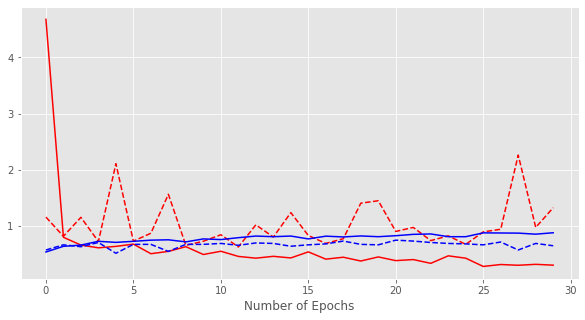

In [15]:
h = inc_history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['acc'], c='blue', label='Training Accuracy')
plt.plot(h['val_acc'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
# plt.legend(loc='best')
plt.show()

In [22]:
model.save('/content/drive/MyDrive/adult_child/model_inc.h5')